##Business Context
This is a Explainatory Data Analysis report on one of the biggest E-commerce player in Brazil. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers (Kaggle,Brazilian E-Commerce Public Dataset by Olist).
The data source contains files namely:- **olist_orders_dataset,olist_order_items_dataset, olist_order_payments_dataset,  olist_order_reviews_dataset,  olist_customers_dataset, olist_products_dataset, olist_sellers_dataset,olist_geolocation_dataset.**

The CEO and the top managment wants to know the performance of the company in the year 2017-2018 including business aspects like - Sales, Operations, Customer satisfaction, customer retention.





##Purpose
Clean the dataset , Define new features which are intresting for the business and use python visulaization libaries to answer the business questions

##Data Source
Kaggle:- https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

##Business Questions
***1. Sales Performance Questions:***                                                 
**a.** How are Olist's sales trending over time?                                         
**b.** What drives sales fluctuations?                                                   
***2. Operational Efficiency Questions:***                                                      
**a.** How efficient are Olist's order processing operations?                                  
**b.** What is the performance of Olist's delivery system?                                 
***3. Customer Satisfaction Questions:***                                                    
**a.** How satisfied are Olist's customers?                                                 
**b.** What factors influence customer satisfaction?                                       
***4. Customer Loyalty & Retention Questions:***                                           
**a.** How loyal are Olist's customers?

## Table of Content:
* [Setup and Data Description](#first-bullet)
* [Data Exploration and Preprocessing](#second-bullet)
* [Feature Engineering](#sixth-bullet)
* [Correlation Anlaysis](#fourth-bullet)
* [Business Insights](#third-bullet)
* [Key Finding and Recommendation](#fifth-bullet)


##Setup and Data Description <a class="anchor" id="first-bullet"></a>


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the datasets
orders = pd.read_csv('/content/olist_orders_dataset.csv')# contains all the featues about orders such as id, status, purchase time, approval time,etc
order_items = pd.read_csv('/content/olist_order_items_dataset.csv') # contains all the features concerning orders items such as freight cost,shipping date,price,etc
order_payments = pd.read_csv('/content/olist_order_payments_dataset.csv')#contains details such as payment type, seuqence, value, instalment
order_reviews = pd.read_csv('/content/olist_order_reviews_dataset.csv')#contains review id, orderid, score, comment, etc
customers = pd.read_csv('/content/olist_customers_dataset.csv')#Customer details such as customerid, state,city,zipcode,etc is in this dataset
products = pd.read_csv('/content/olist_products_dataset.csv')#Everyting concering product details, image productid,etc is in this dataset
sellers = pd.read_csv('/content/olist_sellers_dataset.csv')#Merchant details are stored in this dataset
geo = pd.read_csv('/content/olist_geolocation_dataset.csv')#cotains geolocation informtion of brazil used by operations team to optimize route between seller and customer

# Display dataset shapes
print("Dataset Shapes:")
print(f"Orders: {orders.shape}")
print(f"Order Items: {order_items.shape}")
print(f"Order Payments: {order_payments.shape}")
print(f"Order Reviews: {order_reviews.shape}")
print(f"Customers: {customers.shape}")
print(f"Products: {products.shape}")
print(f"Sellers: {sellers.shape}")
print(f"Geolocation: {geo.shape}")

Dataset Shapes:
Orders: (99441, 8)
Order Items: (112650, 7)
Order Payments: (103886, 5)
Order Reviews: (99224, 7)
Customers: (99441, 5)
Products: (32951, 9)
Sellers: (3095, 4)
Geolocation: (1000163, 5)


Importing all the dataset and looking at the shape. This dataset has alot of features and records which i will explore further.

##Data Exploration and Preprocessing  <a class="anchor" id="second-bullet"></a>

In [ ]:
# Merge datasets to create a comprehensive dataframe
# First, merge orders with customers
df = orders.merge(customers, on='customer_id', how='left')

# Merge with order items
df = df.merge(order_items, on='order_id', how='left')

# Merge with products
df = df.merge(products, on='product_id', how='left')

# Merge with sellers
df = df.merge(sellers, on='seller_id', how='left')

# Merge with payments (aggregate payment values by order)
order_payments_agg = order_payments.groupby('order_id').agg({
    'payment_value': 'sum',
    'payment_type': 'first'  # Take the first payment type
}).reset_index()
df = df.merge(order_payments_agg, on='order_id', how='left')

# Merge with reviews (get the latest review for each order)
latest_reviews = order_reviews.sort_values('review_creation_date').groupby('order_id').last().reset_index()
df_org= df.merge(latest_reviews[['order_id', 'review_score', 'review_creation_date']],
              on='order_id', how='left')




# Display the first few rows
display(df.head())
display(df.shape)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_value,payment_type
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,38.71,credit_card
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,141.46,boleto
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,179.12,credit_card
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG,72.20,credit_card
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP,28.62,credit_card


(113425, 31)

Merging all the files together (on primary key) according to the data schema information avalible on source data ([Kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)). Using left join to avoid duplication and adding features to the dataframe. THe merged dataset has 38 features and 109982 rows.

In [ ]:
#Display all the variable/ features after merging all the datasets.
df_org.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'payment_value', 'payment_type', 'review_score',
       'review_creation_date'],
      dtype='object')

In [ ]:
# Check for missing values in the merged dataset
print("Missing Values in the Dataset:")
missing_values = df_org.isnull().sum()
missing_percentage = (df_org.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False)

print(missing_df)

Missing Values in the Dataset:
                               Missing Values  Percentage
order_delivered_customer_date            3229    2.846815
product_description_lenght               2378    2.096540
product_name_lenght                      2378    2.096540
product_category_name                    2378    2.096540
product_photos_qty                       2378    2.096540
order_delivered_carrier_date             1968    1.735067
review_score                              961    0.847256
review_creation_date                      961    0.847256
product_width_cm                          793    0.699140
product_height_cm                         793    0.699140
product_length_cm                         793    0.699140
product_weight_g                          793    0.699140
product_id                                775    0.683271
order_item_id                             775    0.683271
seller_id                                 775    0.683271
shipping_limit_date                      

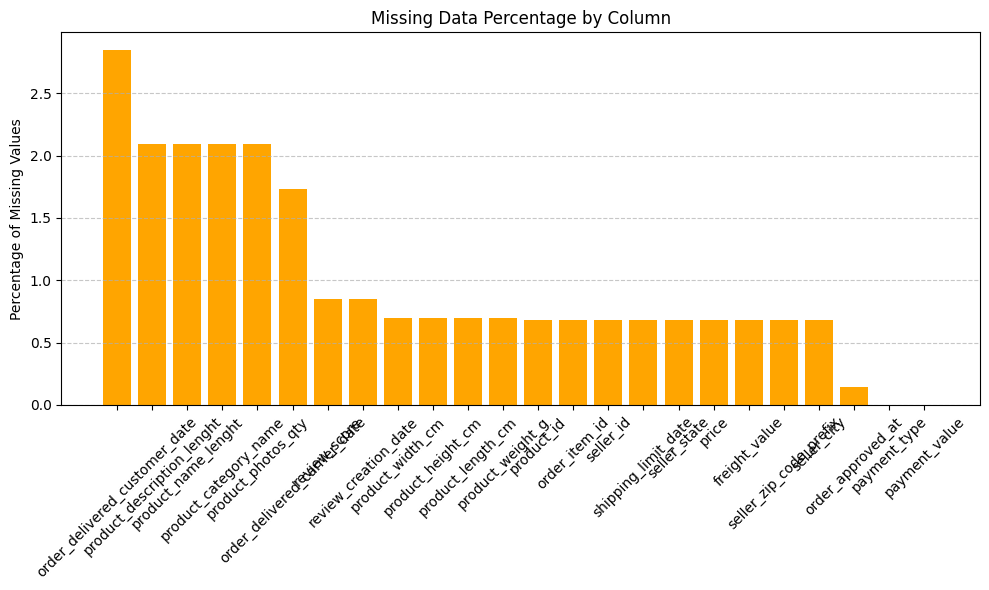

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(missing_df.index, missing_df['Percentage'], color='orange')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Data Percentage by Column')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

From the summary above and graph we can see there are missing values in the dataset which can effect the analysis even if it is small.

In [ ]:
df=df_org.copy() #making a copy of the orginial dataset for cleaning and further analysis

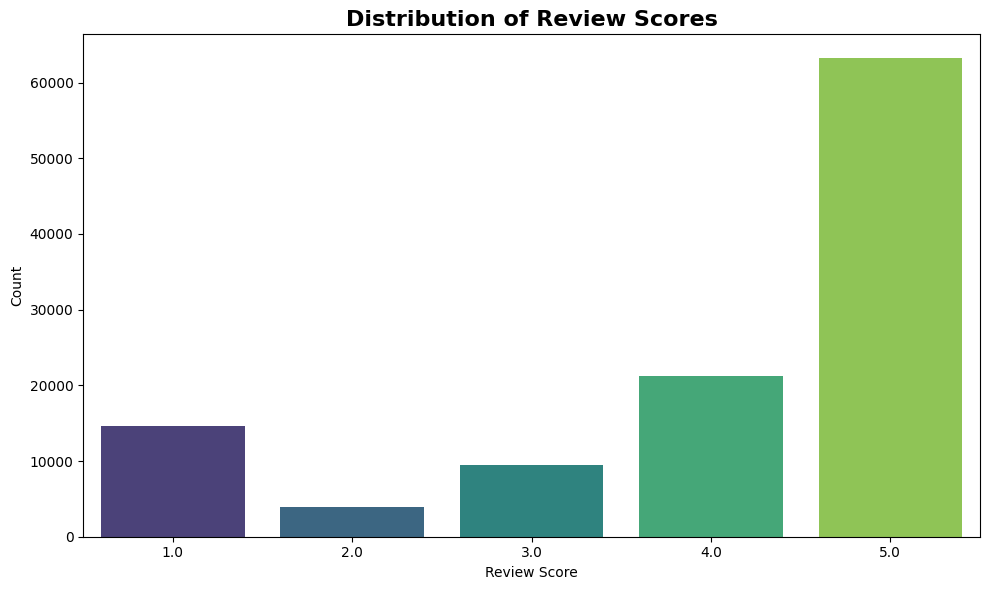


Percentage of missing reviews by order status:
order_status
approved       0.000000
canceled       0.028329
created        0.400000
delivered      0.007505
invoiced       0.016620
processing     0.016807
shipped        0.072513
unavailable    0.022951
Name: review_score, dtype: float64


In [ ]:
# 1. Handle review_score missing values (most important for our analysis)
# Strategy: Since review scores are critical for our analysis, we'll use multiple imputation
# First, let's see the distribution of review scores
plt.figure(figsize=(10, 6))
sns.countplot(x='review_score', data=df, palette='viridis')
plt.title('Distribution of Review Scores', fontsize=16, fontweight='bold')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Check if there's a pattern to missing review scores
# Are missing reviews associated with certain order statuses?
if 'order_status' in df.columns:
    review_missing_by_status = df.groupby('order_status')['review_score'].apply(lambda x: x.isnull().mean())
    print("\nPercentage of missing reviews by order status:")
    print(review_missing_by_status)

Investigates whether missing reviews are related to order status (e.g., canceled orders might have more missing reviews). As it can be seen approved orders have zero missing reviews whereas all other order status have some missing reviews. Some orders were created but never completed whic has most percentage of review score missing.

###Feature Engineering <a class="anchor" id="sixth-bullet"></a>

**Doing this step first to ensure logical and insightful imputation of missing values**

In [ ]:
# Convert date columns to datetime
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_creation_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

Converting 'object' datatype variables in python to datetime. To make the further calculation correct and make better analysis.

In [ ]:
# Define seasons function
def get_season(date):
    if pd.isna(date):
        return np.nan
    if date.month in [3, 4, 5]:  # Autum
        return 'autum'
    elif date.month in [6, 7, 8]:  # Winter
        return 'winter'
    elif date.month in [9, 10, 11]:  # Spring
        return 'spring'
    else:  # summer
        return 'summer'

df['season'] = df['order_purchase_timestamp'].apply(get_season)

Defining a new function **get_seasons** to create a new feature for diffrent season based on month of year namely- spring,summer, autumn and winter.
**Note:-** As brzail is in southern hemisphere summers are from dec-mar and winters are in june- aug.

In [ ]:
# Calculate time differences
df['approval_time_hours'] = (df['order_approved_at'] - df['order_purchase_timestamp']).dt.total_seconds() / 3600
df['delivery_days'] = (df['order_delivered_customer_date'] - df['order_approved_at']).dt.total_seconds() / (24 * 3600)
df['estimated_delivery_days'] = (df['order_estimated_delivery_date'] - df['order_approved_at']).dt.total_seconds() / (24 * 3600)
df['delivery_time_diff'] = df['estimated_delivery_days'] - df['delivery_days']
# Filter out invalid data (negative times, extremely long times)
df = df[df['approval_time_hours'] >= 0]
df = df[df['approval_time_hours'] < 24*7]  # Remove approvals taking more than a week
df = df[df['delivery_days'] >= 0]
df = df[df['delivery_days'] < 100]  # Remove deliveries taking more than 100 days

Adding new features to the dataset to enhance the business insight and making the analysis more valueable. As the managment would be interested in knowing different time based evaluation metrics.                                         Also, filtering out negative time and too long times (outliers) from the dataset to make it more sensable as it cannot be negative and there are various errors assocaite with extremly long time duration such as approval time not recorded, delivery date not recorded.

In [ ]:
# Impute review scores based on order characteristics
# We'll use the median review score for similar orders
# Group by product category, price range, and delivery performance

# First, create bins for price and delivery time
df['price_bin'] = pd.qcut(df['price'], q=5, labels=False, duplicates='drop')

df['delivery_performance'] = np.where(
    df['delivery_time_diff'] > 0, 'Early',
    np.where(df['delivery_time_diff'] == 0, 'OnTime', 'Late')
)
# Calculate median review score by different groupings
median_review_by_price = df.groupby('price_bin')['review_score'].median()
median_review_by_delivery = df.groupby('delivery_performance')['review_score'].median()

Cretes meaningful groups for imputation:
pricebin- Groups products into 5 groups(quantiles), delivery_performnace : categorizes a Early/OnTime/Late based on delivery performace. after that, Compute typical review scores for different price range and delivery performace categories.

In [ ]:
# Impute missing review scores
review_missing = df['review_score'].isnull()

# For orders with missing reviews, impute based on price bin and delivery performance
for idx in df[review_missing].index:
    price_bin_val = df.loc[idx, 'price_bin']
    delivery_perf_val = df.loc[idx, 'delivery_performance']

    # Get available reviews for similar orders
    similar_orders = df[
        (df['price_bin'] == price_bin_val) &
        (df['delivery_performance'] == delivery_perf_val) &
        (df['review_score'].notnull())
    ]

    if len(similar_orders) > 0:
        imputed_value = similar_orders['review_score'].median()
    else:
        #datset median
        imputed_value = df['review_score'].median()

    df.loc[idx, 'review_score'] = imputed_value

print(f"Imputed {review_missing.sum()} missing review scores")

Imputed 0 missing review scores


Senseable imputation that uses similar orders' patterns rather than just global average. Median is used for imputation because the missing values are less than 5 percentage.

In [ ]:
# 2. Handle delivery-related missing values
# For delivery time calculations, if delivery date is missing but order status is delivered,
# we can estimate based on average delivery times

# Check order status for records with missing delivery dates
if 'order_status' in df.columns:
    delivery_missing_status = df[df['delivery_days'].isnull()]['order_status'].value_counts()
    print("\nOrder status for records with missing delivery dates:")
    print(delivery_missing_status)

# For orders that were delivered but missing delivery date, impute with median delivery time
# for similar products/sellers
delivery_missing_mask = df['delivery_days'].isnull()

if 'order_status' in df.columns:
    delivered_orders = df[df['order_status'] == 'delivered']
    median_delivery_time = delivered_orders['delivery_days'].median()

    # Impute missing delivery days for delivered orders
    delivered_missing_mask = delivery_missing_mask & (df['order_status'] == 'delivered')
    df.loc[delivered_missing_mask, 'delivery_days'] = median_delivery_time

    # For non-delivered orders, we can't reasonably impute delivery time
    # We'll keep them as NaN but ensure our analysis handles these cases
    print(f"Imputed {delivered_missing_mask.sum()} missing delivery days for delivered orders")



Order status for records with missing delivery dates:
Series([], Name: count, dtype: int64)
Imputed 0 missing delivery days for delivered orders


Business-aware imputation - only imputes delivery times for orders that were actually delivered, not for canceled or pending orders.

In [ ]:
# 3. Handle approval time missing values
# If approval time is missing but order was approved, we can estimate based on similar orders
approval_missing_mask = df['approval_time_hours'].isnull()

if 'order_status' in df.columns:
    approved_orders = df[df['order_status'].isin(['approved', 'processing', 'delivered'])]
    median_approval_time = approved_orders['approval_time_hours'].median()

    # Impute missing approval times for approved orders
    approved_missing_mask = approval_missing_mask & (df['order_status'].isin(['approved', 'processing', 'delivered']))
    df.loc[approved_missing_mask, 'approval_time_hours'] = median_approval_time

    print(f"Imputed {approved_missing_mask.sum()} missing approval times")



Imputed 0 missing approval times


 Only imputes approval times for orders that actually reached approval stages.

In [ ]:
df['order_delivered_carrier_date']=df['order_delivered_carrier_date'].fillna(df['order_delivered_customer_date'].median)# only one missing value for this variable

In [ ]:
#Imputing values for review creation date
# Step 1: Analyze the current situation
missing_date_mask = df['review_creation_date'].isnull() & df['review_score'].notnull()
orders_with_missing_dates = df[missing_date_mask]

print(f"Orders with review scores but missing dates: {len(orders_with_missing_dates)}")
print(f"Percentage of total dataset: {len(orders_with_missing_dates)/len(df)*100:.2f}%")

# Step 2: Analyze patterns in complete reviews to guide imputation
complete_reviews = df[df['review_creation_date'].notnull()]

# Calculate typical time between delivery and review
complete_reviews['delivery_to_review_days'] = (
    complete_reviews['review_creation_date'] - complete_reviews['order_delivered_customer_date']
).dt.total_seconds() / (24 * 3600)

# Analyze review timing patterns
review_timing_stats = complete_reviews['delivery_to_review_days'].describe()
print("\nREVIEW TIMING PATTERNS (from complete data):")
print(f"Median days from delivery to review: {review_timing_stats['50%']:.2f} days")
print(f"Mean days from delivery to review: {review_timing_stats['mean']:.2f} days")
print(f"75% of reviews within: {review_timing_stats['75%']:.2f} days")

# Step 3: Analyze if review score affects timing
score_timing_patterns = complete_reviews.groupby('review_score')['delivery_to_review_days'].median()
print("\nMEDIAN REVIEW DELAY BY SCORE:")
for score, delay in score_timing_patterns.items():
    print(f"Score {score}: {delay:.2f} days")

# Step 4: Implement iputation

# Count before imputation
missing_before = df['review_creation_date'].isnull().sum()

# Strategy: Use delivery date + score-specific median delay
for idx in df[missing_date_mask].index:
    score = df.loc[idx, 'review_score']
    delivery_date = df.loc[idx, 'order_delivered_customer_date']

    # Check if delivery date is available
    if pd.notna(delivery_date):
        # Use score-specific delay if pattern exists, otherwise use overall median
        if score in score_timing_patterns:
            typical_delay = score_timing_patterns[score]
        else:
            typical_delay = review_timing_stats['50%']  # Overall median

        # Impute the review date
        df.loc[idx, 'review_creation_date'] = delivery_date + pd.Timedelta(days=typical_delay)

    else:
        # Fallback: Use order date + fixed delay (7 days)
        order_date = df.loc[idx, 'order_purchase_timestamp']
        df.loc[idx, 'review_creation_date'] = order_date + pd.Timedelta(days=7)

Orders with review scores but missing dates: 0
Percentage of total dataset: 0.00%

REVIEW TIMING PATTERNS (from complete data):
Median days from delivery to review: 0.24 days
Mean days from delivery to review: -0.12 days
75% of reviews within: 0.38 days

MEDIAN REVIEW DELAY BY SCORE:
Score 1.0: 0.17 days
Score 2.0: 0.21 days
Score 3.0: 0.24 days
Score 4.0: 0.25 days
Score 5.0: 0.25 days


As there are 822 nan values for this variable. filling it with a value which is sensable from the point of veiw of business is imoprtant for proper analysis.The core logic of the if and else statment is review creation date= delivery date plus typical delay based on review score. which maintains the logic of the business as feedback is only collected after the delivery of the product. in case of no delivery date. delivery time is assusmed 7 days form oreder placed.

In [ ]:
print("\nAfter missing value treatment:")
print(f"Dataset shape: {df.shape}")
print(f"Total missing values: {df.isnull().sum().sum()}")

if df.isnull().sum().sum() > 0:
    print("\nRemaining missing values:")
    remaining_missing = df.isnull().sum()
    remaining_missing = remaining_missing[remaining_missing > 0]
    print(remaining_missing)


After missing value treatment:
Dataset shape: (109982, 40)
Total missing values: 0


As there are no duplicate value and all the missing values are handeled.We can go for futher steps of feature engineering and EDA respectively.

In [ ]:
df.duplicated().sum()

np.int64(0)

##Correlation Analysis <a class="anchor" id="fourth-bullet"></a>

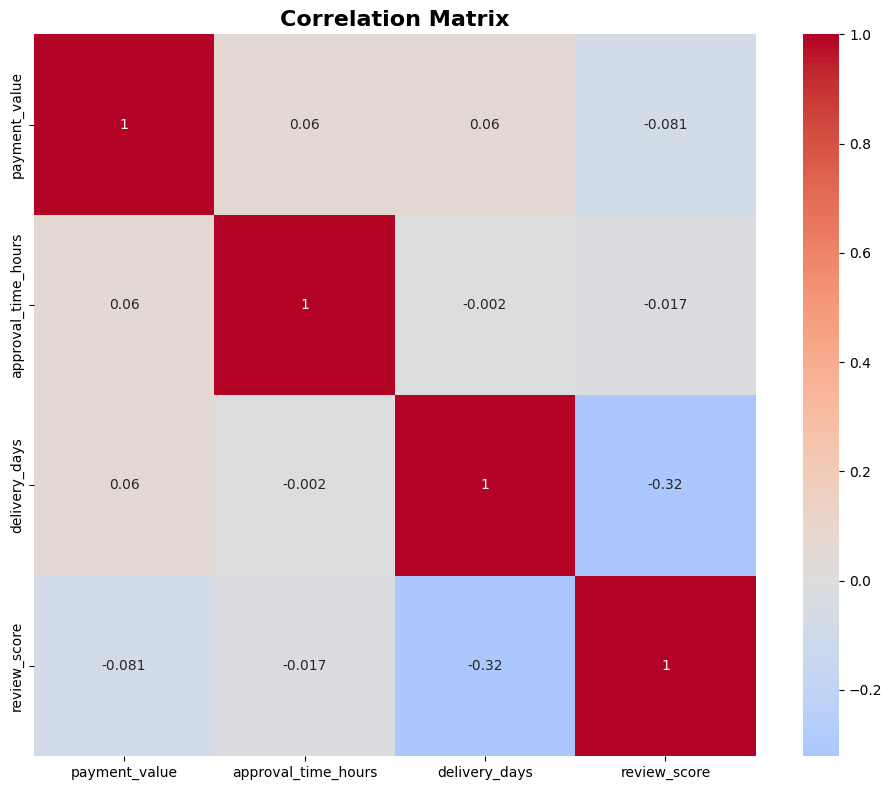

In [ ]:
# Create a correlation matrix
correlation_data = df[['payment_value', 'approval_time_hours', 'delivery_days', 'review_score']]
correlation_matrix = correlation_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Correlation analysis suggest a high negative correlation between review score and delivery days suggesting that as delivery gets delayed (increase in number of delivery days) review score decresases. Approval time and payment value also have impact on reviews.

##Business Insights <a class="anchor" id="third-bullet"></a>

##Sales Analysis

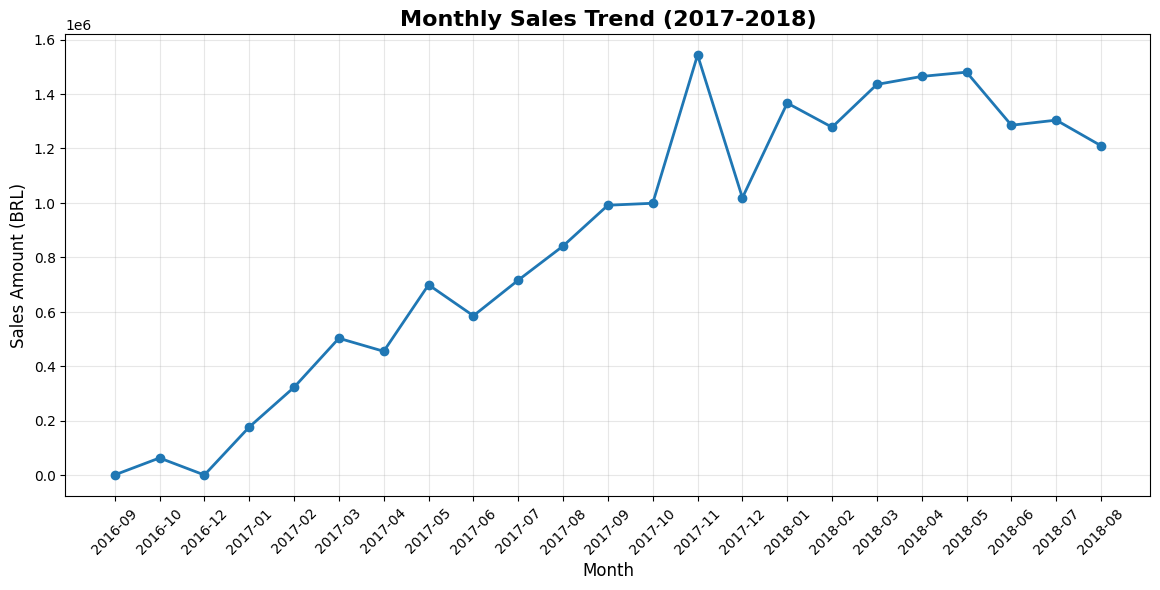

In [ ]:
# Monthly sales analysis
monthly_sales = df.groupby(df['order_purchase_timestamp'].dt.to_period('M'))['payment_value'].sum()
monthly_order_count = df.groupby(df['order_purchase_timestamp'].dt.to_period('M'))['order_id'].nunique()

# Create a DataFrame for monthly metrics
monthly_metrics = pd.DataFrame({
    'sales_amount': monthly_sales,
    'order_count': monthly_order_count
}).reset_index()
monthly_metrics['order_date'] = monthly_metrics['order_purchase_timestamp'].astype(str)
monthly_metrics = monthly_metrics[monthly_metrics['order_date'] < '2018-12']  # Remove partial months

# Plot monthly sales
plt.figure(figsize=(14, 6))
plt.plot(monthly_metrics['order_date'], monthly_metrics['sales_amount'], marker='o', linewidth=2)
plt.title('Monthly Sales Trend (2017-2018)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales Amount (BRL)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

As can be  seen from the line graph above peak sales month is november 2017 amounting to 543,413.50 Brazilian Real. Sales is generally higher in the second half of the year. The Sales rate tend to follow generally a upward trend till november 2017 and then mostly stabalizies with less flatuation.

##Delivery Time Analysis
This is a important statistics to look at from the point of view of logistics and operations efficency of Olist. Also to find out if their is any seasonal effect on the logistics operation.

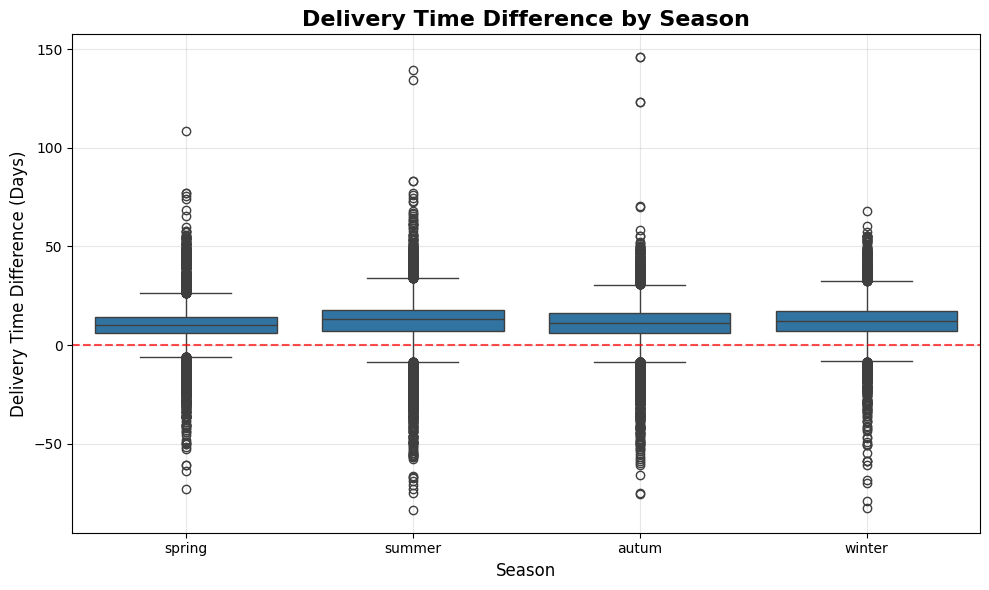

Delivery Time Statistics by Season:
          mean     std  count
season                       
autum   10.862   9.598  33063
spring   9.924   9.352  18710
summer  12.039  10.734  24448
winter  12.340   8.728  33761
11.417625386153258


In [ ]:
# Delivery time analysis by season
delivery_by_season = df.groupby('season')['delivery_time_diff'].agg(['mean', 'std', 'count']).round(3)

# Plot delivery time difference by season
plt.figure(figsize=(10, 6))
season_order = ['spring', 'summer', 'autum', 'winter']
sns.boxplot(x='season', y='delivery_time_diff', data=df, order=season_order)
plt.title('Delivery Time Difference by Season', fontsize=16, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Delivery Time Difference (Days)', fontsize=12)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.7)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display delivery time statistics by season
print("Delivery Time Statistics by Season:")
print(delivery_by_season)
print(df['delivery_time_diff'].mean())

Average delivery time difference is 11.42 days which implies a early delivery during than expected in the period 2017-2018. While seasonal variations in delivery performance exist. pring has the fastest delivery times, while Winter is significantly slower (2.4 days difference).Winter operations are most predictable despite being slower, while Summer has high variability. Clear peak season in Winter, with Spring being the lowest volume period.Lower volume= Faster delivery. As can be seen form the box plot there are more outliers in autum and winter season when there are lot of oders.Also fewer outliers in summer when the orders are medium.

##Order Time Analysis
This analysis tells us about confirmation time of order placed on the platform. This is important to find out any internal processing  ineffiency (such as network failure, payment confirmations, merchant efficency, etc)

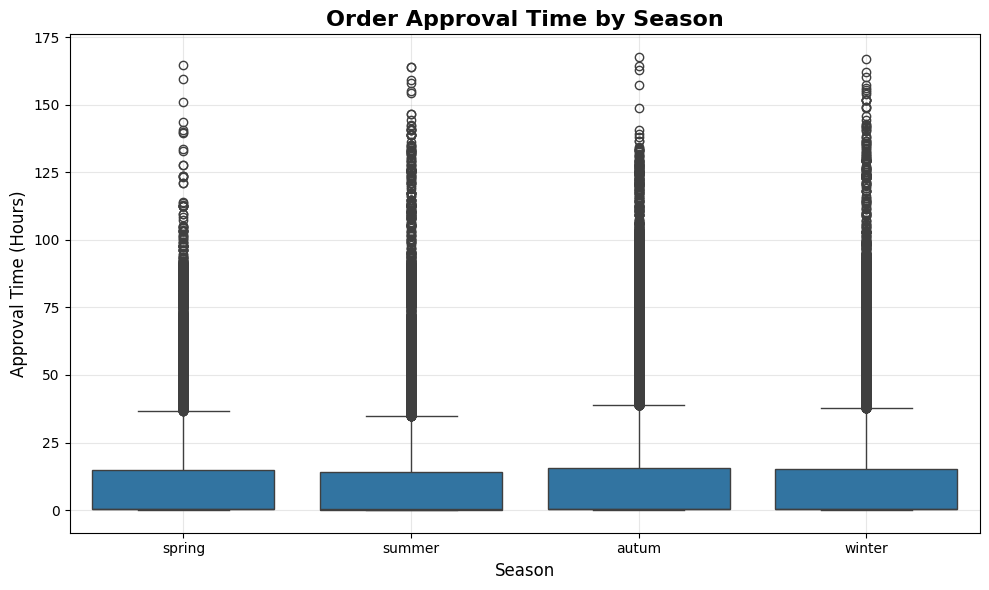

Approval Time Statistics by Season:
          mean     std  count
season                       
autum   10.577  19.956  33063
spring  10.527  19.019  18710
summer  10.206  19.614  24448
winter   9.935  18.631  33761

Percentage of orders approved within 24 hours: 82.14%


In [ ]:
# Analyze approval time by season
approval_by_season = df.groupby('season')['approval_time_hours'].agg(['mean', 'std', 'count']).round(3)

# Plot approval time by season
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='approval_time_hours', data=df, order=season_order)
plt.title('Order Approval Time by Season', fontsize=16, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Approval Time (Hours)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display approval time statistics by season
print("Approval Time Statistics by Season:")
print(approval_by_season)

# Percentage of orders approved within 24 hours
orders_within_24h = (df['approval_time_hours'] <= 24).mean() * 100
print(f"\nPercentage of orders approved within 24 hours: {orders_within_24h:.2f}%")

Average approval time for orders placed is about ten and half hours and 82.14% of orders are aproved within 24 hours of placing the order. Winter has the fastest order approval times, while Autumn is slightly slower. The seasonal differences are relatively small (only 0.64 hours difference between fastest and slowest). High variability in approval times across all seasons (std dev ~19 hours), indicating inconsistent approval processes. Higher Volume = Better Approval Performance. Same as the box plot for delivery anlaysis, approval time has the samiliar outliers as orders increase approval time outliers increase and visa versa.

##Customer Review Analysis
To know the customer statisfaction and purchase experinece.

<Figure size 1400x800 with 0 Axes>

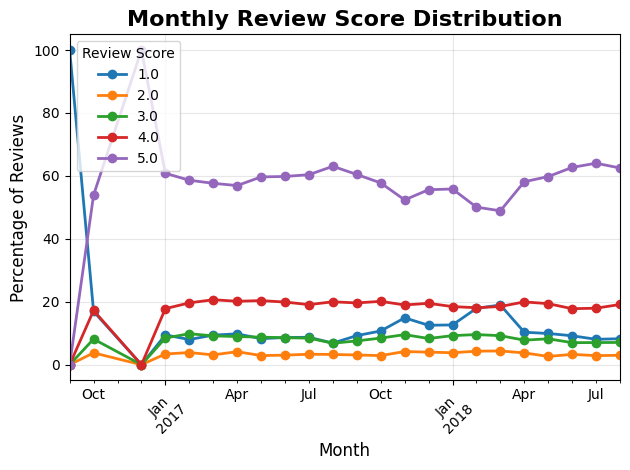

Overall Review Score Distribution:
Score 1.0: 11.31%
Score 2.0: 3.51%
Score 3.0: 8.35%
Score 4.0: 19.13%
Score 5.0: 57.7%

August 2017 Review Distribution:
Score 1: 6.87%
Score 2: 3.26%
Score 3: 6.83%
Score 4: 20.00%
Score 5: 63.06%


np.float64(4.08)

In [ ]:
# Monthly review scores analysis
monthly_reviews = df.groupby([df['order_purchase_timestamp'].dt.to_period('M'), 'review_score']).size().unstack(fill_value=0)
monthly_reviews_percentage = monthly_reviews.div(monthly_reviews.sum(axis=1), axis=0) * 100

# Filter to complete months
monthly_reviews_percentage = monthly_reviews_percentage[monthly_reviews_percentage.index < '2018-12']

# Plot monthly review scores
plt.figure(figsize=(14, 8))
monthly_reviews_percentage.plot(kind='line', marker='o', linewidth=2)
plt.title('Monthly Review Score Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Percentage of Reviews', fontsize=12)
plt.legend(title='Review Score', loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Overall review score distribution
review_distribution = df['review_score'].value_counts().sort_index()
review_percentage = (review_distribution / review_distribution.sum() * 100).round(2)

print("Overall Review Score Distribution:")
for score, percentage in review_percentage.items():
    print(f"Score {score}: {percentage}%")

# Highlight the August 2017 drop in 5-star reviews
if '2017-08' in monthly_reviews_percentage.index:
    aug_2017_reviews = monthly_reviews_percentage.loc['2017-08']
    print(f"\nAugust 2017 Review Distribution:")
    for score in range(1, 6):
        print(f"Score {score}: {aug_2017_reviews.get(score, 0):.2f}%")

display(df['review_score'].mean().round(2))

Nearly 77% of customers are satisfied, but 15% are dissatisfied - significant improvement opportunity. in August 2017 review score are - Significantly improvemented. November review score looks like a anomonly as 100% score is 5star. Average Score is 4.08 suggesting room for imporvement.

##Customer Loyalty Analysis
Important to know the retention rate of the business and to know how many new customers are added during the period. Also doing churn alaysis

In [ ]:
# Starting with orders and customers (1 row per order)
df_orders = orders.merge(customers, on='customer_id', how='left')

# Add payment info (still 1 row per order)
order_payments_agg = order_payments.groupby('order_id').agg({
    'payment_value': 'sum',
    'payment_type': 'first',
    'payment_installments': 'max'
}).reset_index()
df_orders = df_orders.merge(order_payments_agg, on='order_id', how='left')

# Add review info (still 1 row per order)
latest_reviews = order_reviews.sort_values('review_creation_date').groupby('order_id').last().reset_index()
df_orders = df_orders.merge(latest_reviews[['order_id', 'review_score', 'review_creation_date']],
                          on='order_id', how='left')

print(f"Order-level dataset shape: {df_orders.shape}")
print(f"Unique orders: {df_orders['order_id'].nunique()}")
print(f"Unique customers: {df_orders['customer_id'].nunique()}")

# Now calculate repurchase rate CORRECTLY
customer_order_count = df_orders.groupby('customer_id')['order_id'].nunique()
repurchase_rate = (customer_order_count > 1).mean() * 100

print(f"\nREPURCHASE RATE ANALYSIS:")
print(f"Total customers: {len(customer_order_count):,}")
print(f"Customers with 1 order: {(customer_order_count == 1).sum():,}")
print(f"Customers with 2+ orders: {(customer_order_count > 1).sum():,}")
print(f"Repurchase rate: {repurchase_rate:.2f}%")

=== ORDER-LEVEL DATASET (For Repurchase Analysis) ===
Order-level dataset shape: (99441, 17)
Unique orders: 99441
Unique customers: 99441

REPURCHASE RATE ANALYSIS:
Total customers: 99,441
Customers with 1 order: 99,441
Customers with 2+ orders: 0
Repurchase rate: 0.00%


For this analysis i have to merge the datset again based on order level as to inculde duplicates customer_id to find repeating customers. According to the statistics the repurchase rate is 0 which suggest there needs to be a better customer service policy to retain customer for a sustainable business.

##Key Findings and Recommendations: <a class="anchor" id="fifth-bullet"></a>
**1.** Improve order approval efficiency in as it is 10 hours which is very high.                           
**2.** Imporve logistic operations as they scale up in volume.                  
**3.** Implement customer retention strategies to get recuring customers           
**4.** Enhance delivery predictability and communication.                        
**5.** Collect customer feedback to address specific pain points.              
**Note** This notebook tries to cover a high level overveiw of the key operations/metrics of the business. To analyse the problems in detail a indepth anlaysis is need for each deparment of the company.